# Come l'intelligenza Artificiale puo' migliorare la PA

## un esempio pratico su Regione Toscana


## - Problema

## - Soluzione

## - Vantaggi dell'Intelligenza Artificiale per la PA

# Problema

### - Solo nel 2017 `Regione Toscana` ha ricevuto piu' di 300 mila documenti in entrata, **manualmente** protocollati e smistati agli uffici di compentenza

### - Ogni ufficio e' organizzato in maniera gerarchia e deve inoltra al suo interno i documenti


### - Questa processo e' altamente inefficiente

### - La sua ottimizzazione comporta un guadagno economico per la Regione

# Analizziamo in Dettaglio

- Di quali uffici parliamo?

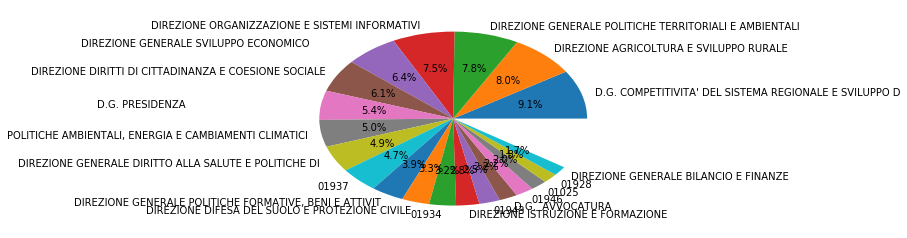

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

df = pd.read_pickle('./data/atti-dirigenti-named.pkl')

df_act_office = df.groupby(df['UFFICIO_DG'])['CODICE_PRATICA'].count()
df_act_office /= df_act_office.sum()
top = df_act_office.sort_values(ascending=False)[:20]

plt.pie(top, labels=top.index, autopct='%1.1f%%')
plt.show()

In [13]:
pd.options.display.float_format = '{:.2f}%'.format
data = pd.DataFrame(top * 100)

In [14]:
data

,CODICE_PRATICA
UFFICIO_DG,
D.G. COMPETITIVITA' DEL SISTEMA REGIONALE E SVILUPPO D,9.07%
DIREZIONE AGRICOLTURA E SVILUPPO RURALE,8.02%
DIREZIONE GENERALE POLITICHE TERRITORIALI E AMBIENTALI,7.75%
DIREZIONE ORGANIZZAZIONE E SISTEMI INFORMATIVI,7.51%
DIREZIONE GENERALE SVILUPPO ECONOMICO,6.38%
DIREZIONE DIRITTI DI CITTADINANZA E COESIONE SOCIALE,6.09%
D.G. PRESIDENZA,5.44%
"POLITICHE AMBIENTALI, ENERGIA E CAMBIAMENTI CLIMATICI",4.99%
DIREZIONE GENERALE DIRITTO ALLA SALUTE E POLITICHE DI,4.91%


# Analizziamo in Dettaglio

- Invece, qual e' la distribuzione dei documenti pubblicati da Regione Toscana?

In [5]:
import seaborn as sns
sns.set_style("whitegrid")

def label_rotation(ax, angle):
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    return ax

acts_per_year = df.groupby([df['DATA_ATTO'].dt.year])['CODICE_PRATICA'].count()


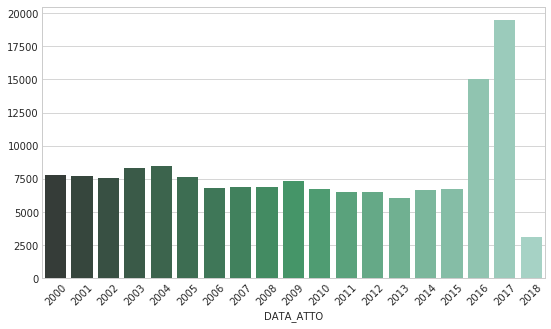

In [6]:
fig, ax = plt.subplots()
sns.barplot(acts_per_year.index, acts_per_year.values, palette="BuGn_d", ax=ax)
label_rotation(ax, 45)
fig.set_size_inches(9,5)

# Soluzione Proposta

### - Intelligenza Artificiale per smistare la posta in automatico

In dettaglio, abbiamo realizzato una Intelligenza Artificale che utilizza tecniche di [Deep Learning]() per etichettare automaticamente i documenti in arrivo e assegnali agli uffici di competenza.

Tutto questo e' basato unicamente sulle informazioni contenute nel campo oggetto.


## [Demo](http://ml-api.westeurope.cloudapp.azure.com/)



L.R. 3/94 Art. 37 - autorizzazione interventi di controllo sulla specie Colombo di città – Piccione (Columba livia forma domestica)_NUI_AR/18/80 e AR/18/81.

http://www.regione.toscana.it/bancadati/atti/DettaglioAttiD.xml?codprat=2018AD00000006636

Ecogest Srl (P.I. 00519200976). Rinnovo con modifica dell’autorizzazione unica, ai sensi dell’art. 208 del D.Lgs 152/06 e smi, dell’impianto di gestione rifiuti pericolosi e non pericolosi prodotti da Enel Green Power Spa con sede legale in via Zarini, 24/28 nel comune di Prato e sede operativa ubicata all’interno dell’ex centrale Enel Green Power Larderello 2 nel comune di Pomarance (PI).

http://www.regione.toscana.it/bancadati/atti/DettaglioAttiD.xml?codprat=2018AD00000006618

# Vantaggi dell'Intelligenza Artificiale (IA)

### - Automatizzare task ripetiviti. Classifica correttamente l *84%* dei documenti osservandone solo l'oggetto.

### - Riuso del codice sorgente

### - Riuso dei modelli appresi

# Vantaggi dell'Intelligenza Artificiale (IA)

### - la qualita' del modello e' migliorabile utilizzando il testo dei documenti.

![Accuratezza](download.png)

# Democratizzazione della IA

### - Tutto il codice sorgente e' [Open Source](https://github.com/teamdigitale/daf-deep-learning)

### - il modello e' reso accessibile mediante un web service

### - Uno degli obiettivi del DAF e' quello di rendere accessibile a tutte le PA i benifici dell'intelligenza Artificiale condividendo:

    - Codice
    - Modelli
    - Buone Pratiche
    - Servizi e Applicazioni

### tutto questo per aumentare l'efficienza e l'innovativita' delle PA   

# Fine

Riferimenti Scientifici:

- [Character-level Convolutional Networks for Text Classification. NIPS 2015](http://arxiv.org/abs/1509.01626)
- [Character-Aware Neural Language Models. AAAI 2016](https://arxiv.org/abs/1508.06615)
- [Evaluation Measures for Hierarchical Classification: a unified view and novel approaches](https://arxiv.org/abs/1306.6802)
- [HiNet: Hierarchical Classification with Neural Network](https://arxiv.org/abs/1705.11105)


# Bonus: Insight sui Dati Analizzati

# Quanti atti firmano i dirigenti per anno?

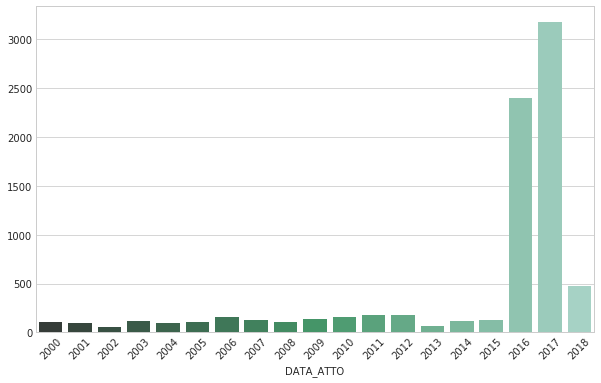

In [7]:
df_person = df[df['PERSONA'] == '005549']
acts_per_year_person = df_person.groupby([df_person['DATA_ATTO'].dt.year])['CODICE_PRATICA'].count()

fig, ax = plt.subplots()
sns.barplot(acts_per_year_person.index, acts_per_year_person.values, palette="BuGn_d", 
            ax=ax, order=acts_per_year_person.index)
label_rotation(ax, 45)
fig.set_size_inches(10,6)
plt.show(fig)

# In quali uffici hanno lavorato i vari Dirigenti?

In [8]:
df_person = df[df['PERSONA'] == '005549']
df_person['UFFICIO_DG'].unique()

array(['DIREZIONE AGRICOLTURA E SVILUPPO RURALE',
       'DIREZIONE GENERALE SVILUPPO ECONOMICO                 ',
       "D.G. COMPETITIVITA' DEL SISTEMA REGIONALE E SVILUPPO D", '01934',
       'ALTRI UFFICI'], dtype=object)